
# Project: Investigate a Dataset (No-show appointments Analysis!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Hello,
i found this dataset intersting to analyse and to know why people skipping there appointments in Beasil medical hospital and i analyzed the varibles related to skipping the appointments, 

## Important Varibles Explanation

ScheduledDay = on what day the patient booked his appointment 

AppointmentDay = the day of the appointment

Age = age of patient

Scholarship =  indicate if patient is enrolled in Brasilian welfare program Bolsa Família

Handcap = indicate if patient is handicap

SMS_received = is patient recevied a message about appointment

No-show = Yes> Patient didnt show , No> Paitent shows




## List of questions i want to analyse 
is the age related to miss the appointment?

Is patients with scholarships affect showing up?

is the SMS_receive related to miss the appointment?

is the time relared to miss the appointment?

is Handcap related to missing the appointmenT?

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')


%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


In [2]:
df = pd.read_csv('KaggleV2-May-2016.csv')

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# I will drop columns that i would not use for analysis

df.drop(['PatientId','AppointmentID','Neighbourhood','Hipertension','Diabetes','Gender','Alcoholism'], axis=1 , inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ScheduledDay    110527 non-null  object
 1   AppointmentDay  110527 non-null  object
 2   Age             110527 non-null  int64 
 3   Scholarship     110527 non-null  int64 
 4   Handcap         110527 non-null  int64 
 5   SMS_received    110527 non-null  int64 
 6   No-show         110527 non-null  object
dtypes: int64(4), object(3)
memory usage: 5.9+ MB


#### So there is no null values in the dataset , all of them has 110527 entry
#### SheduledDay and AppointmentDay should converted to date format

In [5]:
df.shape

(110527, 7)

In [6]:
df.describe()

,Age,Scholarship,Handcap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.022248,0.321026
std,23.110205,0.297675,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,4.000000,1.000000


#### notice minimun of age is -1 which is not realstic!

In [7]:
temp=df[df['Age'] < 0]
temp.count()

ScheduledDay      1
AppointmentDay    1
Age               1
Scholarship       1
Handcap           1
SMS_received      1
No-show           1
dtype: int64

#### There is one record with age of < 0 so i will remove it later in the cleaning step

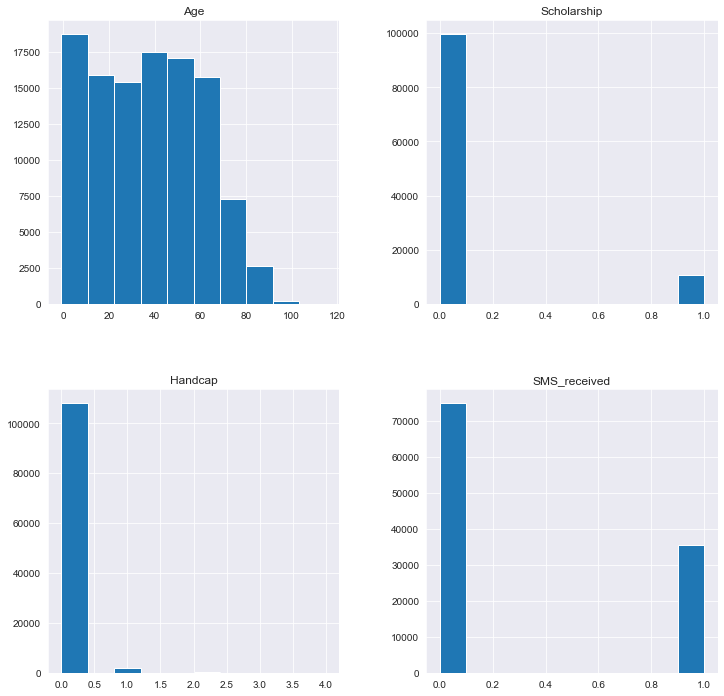

In [8]:
df.hist(figsize=(12,12));

#### Age is Right-skewed
#### most of them didnt receive SMS 
#### most of them non-Handicap
#### most of them do not have a scolarship

In [9]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

#### most of them didnt miss the appointment!

### Data Cleaning 

In [10]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


Steps for cleaning 
1) make all columns lowercase and in same format

2) change the SheduledDay and AppointmentDay to date format

3) drop the column with age of -1

### 1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ScheduledDay    110527 non-null  object
 1   AppointmentDay  110527 non-null  object
 2   Age             110527 non-null  int64 
 3   Scholarship     110527 non-null  int64 
 4   Handcap         110527 non-null  int64 
 5   SMS_received    110527 non-null  int64 
 6   No-show         110527 non-null  object
dtypes: int64(4), object(3)
memory usage: 5.9+ MB


In [12]:
df.rename(columns={'Gender': 'gender', 
                   'ScheduledDay': 'scheduled_day', 
                   'AppointmentDay': 'appointment_day',
                   'Age': 'age',
                   'Scholarship': 'scholarship', 
                   'Alcoholism': 'alcoholism',
                   'handcap':'handcap',
                   'SMS_received':'sms_received',
                   'No-show':'no_show'
                  }, inplace=True)

In [13]:
df['scheduled_day'] = pd.to_datetime(df['scheduled_day']).dt.date.astype('datetime64[ns]')
df['appointment_day'] = pd.to_datetime(df['appointment_day']).dt.date.astype('datetime64[ns]')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   scheduled_day    110527 non-null  datetime64[ns]
 1   appointment_day  110527 non-null  datetime64[ns]
 2   age              110527 non-null  int64         
 3   scholarship      110527 non-null  int64         
 4   Handcap          110527 non-null  int64         
 5   sms_received     110527 non-null  int64         
 6   no_show          110527 non-null  object        
dtypes: datetime64[ns](2), int64(4), object(1)
memory usage: 5.9+ MB


In [14]:
df['appointment_diffrence'] =  (df.appointment_day - df.scheduled_day).dt.days

In [15]:
# dump record with -1 age
df = df[df['age']>=0]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   scheduled_day          110526 non-null  datetime64[ns]
 1   appointment_day        110526 non-null  datetime64[ns]
 2   age                    110526 non-null  int64         
 3   scholarship            110526 non-null  int64         
 4   Handcap                110526 non-null  int64         
 5   sms_received           110526 non-null  int64         
 6   no_show                110526 non-null  object        
 7   appointment_diffrence  110526 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(1)
memory usage: 7.6+ MB


In [17]:
df.describe()

,age,scholarship,Handcap,sms_received,appointment_diffrence
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.022248,0.321029,10.183794
std,23.110026,0.297676,0.161543,0.466874,15.255034
min,0.000000,0.000000,0.000000,0.000000,-6.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,4.000000
75%,55.000000,0.000000,0.000000,1.000000,15.000000
max,115.000000,1.000000,4.000000,1.000000,179.000000


In [18]:
#there is a cases that goes to appointment before original date so i will dump them.
df[df['appointment_diffrence']<0]

,scheduled_day,appointment_day,age,scholarship,Handcap,sms_received,no_show,appointment_diffrence
27033,2016-05-10,2016-05-09,38,0,1,0,Yes,-1
55226,2016-05-18,2016-05-17,19,0,1,0,Yes,-1
64175,2016-05-05,2016-05-04,22,0,0,0,Yes,-1
71533,2016-05-11,2016-05-05,81,0,0,0,Yes,-6
72362,2016-05-04,2016-05-03,7,0,0,0,Yes,-1


In [19]:
df = df[df['appointment_diffrence']>=0]

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   scheduled_day          110521 non-null  datetime64[ns]
 1   appointment_day        110521 non-null  datetime64[ns]
 2   age                    110521 non-null  int64         
 3   scholarship            110521 non-null  int64         
 4   Handcap                110521 non-null  int64         
 5   sms_received           110521 non-null  int64         
 6   no_show                110521 non-null  object        
 7   appointment_diffrence  110521 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(1)
memory usage: 7.6+ MB


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Is more period between appoinments related with not showing?)

In [21]:
# Use this, anddd more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


In [22]:
df.groupby('no_show')['appointment_diffrence'].mean()

no_show
No      8.754759
Yes    15.835484
Name: appointment_diffrence, dtype: float64

Text(0, 0.5, 'Appointment diffrence')

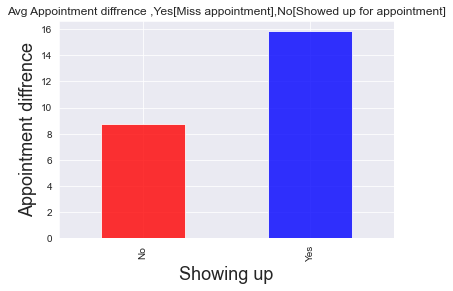

In [23]:
colors = ['red','blue']
df.groupby('no_show')['appointment_diffrence'].mean().plot(kind='bar',
                                                           title = 'Avg Appointment diffrence ,Yes[Miss appointment],No[Showed up for appointment]',
                                                           color=colors, alpha=.8);

plt.xlabel('Showing up',fontsize=18)
plt.ylabel('Appointment diffrence',fontsize=18)

### So as we can see the people who waited on average 15 days they didnt show up for their appointment , and people who showed up the average waiting was 8 days

### Research Question 2 (Is patients with scholarships affect showing up?)

In [24]:
have_scholar = df.scholarship == True
no_scholar = df.scholarship == False

In [25]:
no_show_have_scholar= df.no_show[have_scholar].value_counts()
no_show_have_scholar

No     8283
Yes    2578
Name: no_show, dtype: int64

In [26]:
df.no_show[have_scholar].count()

10861

In [27]:
print("Precentege of people who have a scholarshop and missed the appointment:")
prec_scholar = (no_show_have_scholar['Yes'] / df.no_show[have_scholar].count()) * 100
prec_scholar

Precentege of people who have a scholarshop and missed the appointment:


23.73630420771568

In [28]:
no_show_no_scholar = df.no_show[no_scholar].value_counts()
no_show_no_scholar

No     79924
Yes    19736
Name: no_show, dtype: int64

In [29]:
print("Precentege of people who dosn't have a scholarship and missed the appointment:")
prec_no_scholar = (no_show_no_scholar['Yes'] / df.no_show[no_scholar].count()) * 100
prec_no_scholar

Precentege of people who dosn't have a scholarship and missed the appointment:


19.803331326510136

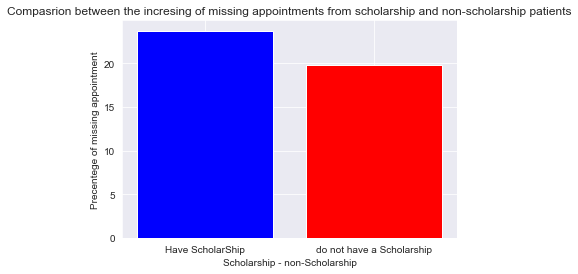

In [30]:
plt.bar(["Have ScholarShip", "do not have a Scholarship"], [prec_scholar, prec_no_scholar],color=['blue','red'])
plt.title("Compasrion between the incresing of missing appointments from scholarship and non-scholarship patients")
plt.xlabel("Scholarship - non-Scholarship")
plt.ylabel("Precentege of missing appointment");

#### As we csn see above , there is a small increasing in missing appointment for those who have  a scholarshop
#### it increased from 19.8% to 23.7% 
#### so it may have a relationship that if a patient have a scholarship he have a slightly higher chance to miss the appointment

### Research Question 3 (is the SMS_receive related to miss the appointment?)


In [31]:
sms_recived = df.sms_received == True
sms_not_recived = df.sms_received == False

In [32]:
sms = df.no_show[sms_recived].value_counts()
sms

No     25698
Yes     9784
Name: no_show, dtype: int64

In [33]:
no_sms = df.no_show[sms_not_recived].value_counts()
no_sms

No     62509
Yes    12530
Name: no_show, dtype: int64

In [34]:
print("Precentege of people who recevied SMS and missed the appointment:")
prec_sms_recived_and_miss = (sms['Yes'] / df.no_show[sms_recived].count()) * 100
prec_sms_recived_and_miss

Precentege of people who recevied SMS and missed the appointment:


27.574544839637

In [35]:
print("Precentege of people who didnt recevied SMS and missed the appointment:")
prec_no_sms_recived_and_miss = (no_sms['Yes'] / df.no_show[sms_not_recived].count()) * 100
prec_no_sms_recived_and_miss

Precentege of people who didnt recevied SMS and missed the appointment:


16.697983715134797

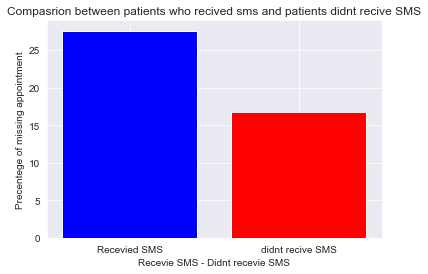

In [36]:
plt.bar(["Recevied SMS", "didnt recive SMS"], [prec_sms_recived_and_miss, prec_no_sms_recived_and_miss],color=['blue','red'])
plt.title("Compasrion between patients who recived sms and patients didnt recive SMS")
plt.xlabel("Recevie SMS - Didnt recevie SMS")
plt.ylabel("Precentege of missing appointment");

### Thats Wierd! as we se in the bar chart that the people who recevied SMS have a higher chance to miss the appointment!

#### 27.57% chance of missing appointment for those who recevied SMS!
#### 16.69% chance of missing appointment for those who didnt recevied SMS!



### Research Question 4 (is the Handicap patient related to miss the appointment?)



In [37]:
Handcap_person = df.Handcap == True
ok_person = df.Handcap == False

In [38]:
hc = df.no_show[Handcap_person].value_counts()
hc

No     1676
Yes     364
Name: no_show, dtype: int64

In [39]:
no_hc = df.no_show[ok_person].value_counts()
no_hc

No     86373
Yes    21909
Name: no_show, dtype: int64

In [40]:
print("Precentege of handicap who missed the appointment:")
prec_hc = (hc['Yes'] / df.no_show[Handcap_person].count()) * 100
prec_hc

Precentege of handicap who missed the appointment:


17.84313725490196

In [41]:
print("Precentege of non-handicap person who missed the appointment:")
prec_no_hc = (no_hc['Yes'] / df.no_show[ok_person].count()) * 100
prec_no_hc

Precentege of non-handicap person who missed the appointment:


20.233279769490775

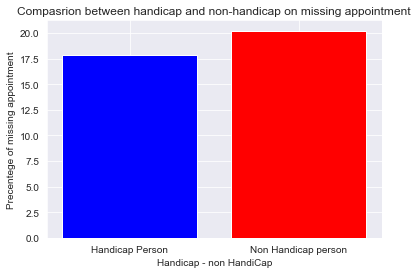

In [42]:
plt.bar(["Handicap Person", "Non Handicap person"], [prec_hc, prec_no_hc],color=['blue','red'])
plt.title("Compasrion between handicap and non-handicap on missing appointment")
plt.xlabel("Handicap - non HandiCap")
plt.ylabel("Precentege of missing appointment");

#### so handicap peaple is most likley to attend the appointment

###### Research Question 5 (is the age related to miss the appointment??)




In [49]:
df.groupby('no_show')['age'].mean()

no_show
No     37.790504
Yes    34.317872
Name: age, dtype: float64

Text(0, 0.5, 'Age')

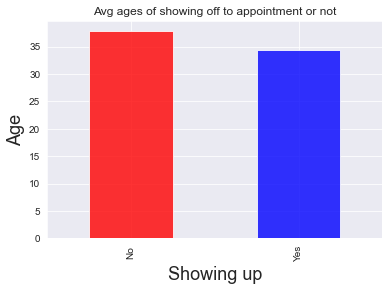

In [44]:
colors = ['red','blue']
df.groupby('no_show')['age'].mean().plot(kind='bar',  title = 'Avg ages of showing off to appointment or not',
                                                           color=colors, alpha=.8);

plt.xlabel('Showing up',fontsize=18)
plt.ylabel('Age',fontsize=18)

#### As we see the people who shows for appointment is most likley with mean age of 37 but peaople who skippd thier appointment
#### is mean of age 34, so we can observe here that older people is most likley to attend the appointment

<a id='conclusions'></a>
## Conclusions




So in conclusion and after doing analysis the dataset i can answer those questions below:

#### Is more period between appoinments related with not showing?
Answer: Yeas as we see in graph more period = more likely to not show on appointment

#### Is patients with scholarships affect showing up?
Answer: It may affect because as we saw the precentege of skipping appointment is incresed with people with scholarship, they are most likley to not show on appointment

#### is the SMS_recive related to miss the appointment?
Answer: this one is wierd becuse we saw people who received SMS is most likley to not show!

#### is the Handicap patient related to miss the appointment?
Answer: We saw that non-handicap people is most likely to not show to the appointment

#### is the age related to miss the appointment??
Answer: we saw that old people is most likley to show to the appointment